绘制遍历参数组合下模型准确率的热力图

In [ ]:
import os
import re
import numpy as np上
import matplotlib.pyplot as plt

#------通过读取保持混淆矩阵图片名称实现读取M,N,Accuracy 图片命名：‘M_{}_N_{}_{Accuracy}.png
# 指定包含图片文件的文件夹路径
folder_path = 'confusion_Matrix_six_hmm'
# 获取文件夹中符合条件的图片文件名
file_names = [f for f in os.listdir(folder_path) if f.endswith('.png')]
file_names_filtered = [f for f in file_names if int(re.search(r'M_(\d+)_N_(\d+)', f).group(1)) < 15 and int(re.search(r'M_(\d+)_N_(\d+)', f).group(2)) < 15]

# 提取图片文件名中的M、N和小数部分
data = []
for file_name in file_names_filtered:
    match = re.match(r'M_(\d+)_N_(\d+)_(\d+\.\d+).png', file_name)
    if match:
        m = int(match.group(1))
        n = int(match.group(2))
        value = float(match.group(3))
        value = round(value, 2)
        data.append((m, n, value))

# 创建热力图数据矩阵
max_m = 12
max_n = 12
heatmap_data = np.zeros((max_m, max_n))
for m, n, value in data:
    heatmap_data[m-3, n-3] = value
heatmap_data

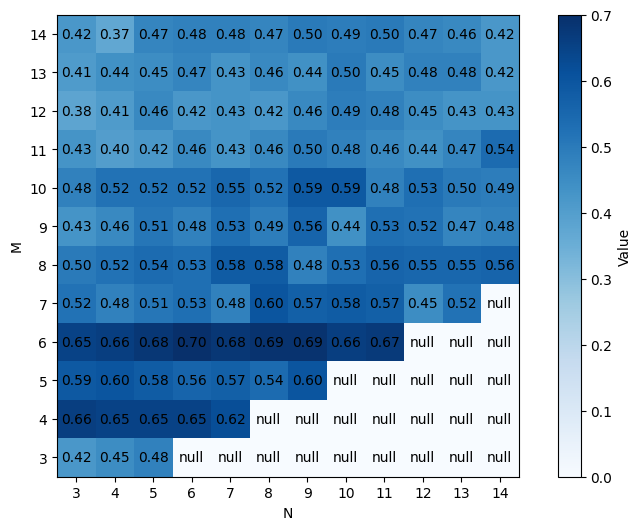

In [2]:
# 绘制热力图（设定颜色映射）
plt.figure(figsize=(10, 6))
plt.imshow(heatmap_data, cmap='Blues')
plt.xticks(np.arange(max_n), np.arange(3, max_n+3))
plt.yticks(np.arange(max_m), np.arange(3, max_m+3))
plt.colorbar(label='Value')
plt.xlabel('N')
plt.ylabel('M')

# 在每个方块中心位置显示数值
for i in range(max_m):
    for j in range(max_n):
        if heatmap_data[i, j] == 0:
            plt.text(j, i, 'null', ha='center', va='center', color='black')
        else:
            plt.text(j, i, f'{heatmap_data[i, j]:.2f}', ha='center', va='center', color='black')

plt.gca().invert_yaxis()
plt.show()